# Implementation of YOLOv7

---



## Install Dependencies

In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1157, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1157 (delta 10), reused 15 (delta 8), pack-reused 1139
Receiving objects: 100% (1157/1157), 70.41 MiB | 23.52 MiB/s, done.
Resolving deltas: 100% (498/498), done.
/content/yolov7/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Adding Custom Data

In [ ]:

%cd /content

!pip install roboflow>=1.0.1

from roboflow import Roboflow
rf = Roboflow(api_key="jGHra0EJd58vh4Nk7ItG")
project = rf.workspace("nust-nsznm").project("project_group11")
dataset = project.version(3).download("yolov7")


/content
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Project_Group11-3 in yolov7pytorch:: 100%|██████████| 52/52 [00:01<00:00, 48.75it/s]


## Prepare image path in txt file

In [ ]:
import os


In [ ]:
train_img_path = "/content/Project_Group11-3/train/images"
val_img_path = "/content/Project_Group11-3/valid/images"

In [ ]:
%cd /content

/content


In [ ]:
#Training images
with open('train.txt', "a+") as f:
  img_list = os.listdir(train_img_path)
  for img in img_list:
    f.write(os.path.join(train_img_path,img+'\n'))
  print("Done")

Done


In [ ]:
# Validation Image
with open('val.txt', "a+") as f:
  img_list = os.listdir(val_img_path)
  for img in img_list:
    f.write(os.path.join(val_img_path,img+'\n'))
  print("Done")

## Download Pretrained weight

In [ ]:
# download COCO starting checkpoint
%cd /content/yolov7
!wget "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt"

## Customize model for your dataset

In [ ]:
%cp /content/yolov7/cfg/training/yolov7.yaml /content/yolov7/cfg/training/custom_yolov7.yaml



1. Open /content/yolov7/cfg/training/custom_yolov7.yaml
2. On line#2, change value of nc from 80 to 1 as shown below





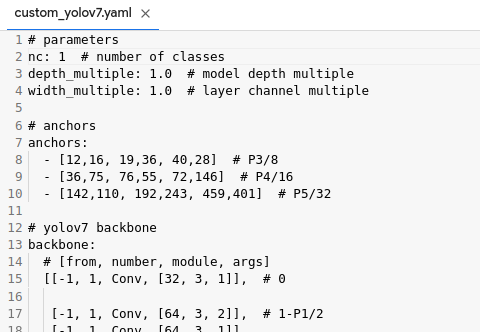




3. Open /content/Project_Group11-3/data.yaml
4. Change the train, val and test paths as shown below


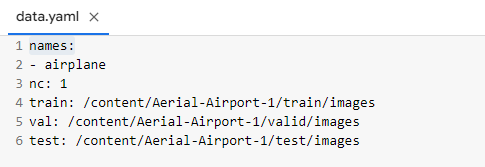

## Begin Training

In [ ]:
%cd /content/yolov7
!python train.py --batch 4 --cfg cfg/training/custom_yolov7.yaml --epochs 20 --data /content/Project_Group11-3/data.yaml --weights 'yolov7.pt' --device 0


## Evaluation

In [ ]:
# Run test.py
!python test.py --weights /content/yolov7/runs/train/exp/weights/best.pt  --task test --data /content/Project_Group11-3/data.yaml

## Inference

In [ ]:
!python detect.py --weights /content/yolov7/runs/train/exp/weights/best.pt --source /content/Project_Group11-3/test/images

In [ ]:
#display inference on ALL infered images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7/runs/detect/exp2/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

In [ ]:
# optional, zip to download weights and results locally
# To deploy, you'll need to export your weights and save them to use later.
!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp/weights/best.pt
!zip export.zip runs/train/exp/*